### Text to Image with Hugging Face

1. To allow user to input chinese sentence, translate that to english.
2. based on that english sentence generate an image.

In [ ]:
!pip install -qqq torch torchvision
!pip install -qqq diffusers transformers
!pip install -qqq sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 16.9 MB/s eta 0:00:00


In [ ]:
import torch
from PIL import Image
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from diffusers import StableDiffusionPipeline

In [ ]:
def translate_chinese_to_english(text, model_name="Helsinki-NLP/opus-mt-zh-en"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    inputs = tokenizer.encode(text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

def generate_image(prompt, model_name="CompVis/stable-diffusion-v1-4", output_path="generated_image.png"):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    pipe = StableDiffusionPipeline.from_pretrained(model_name)
    pipe = pipe.to(device)
    image = pipe(prompt).images[0]  # Get the first generated image
    image.save(output_path)
    return output_path

Translated Text: A puppy playing water by the lake in the Grand An Forest Park.
Generating image from prompt...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: generated_image.png


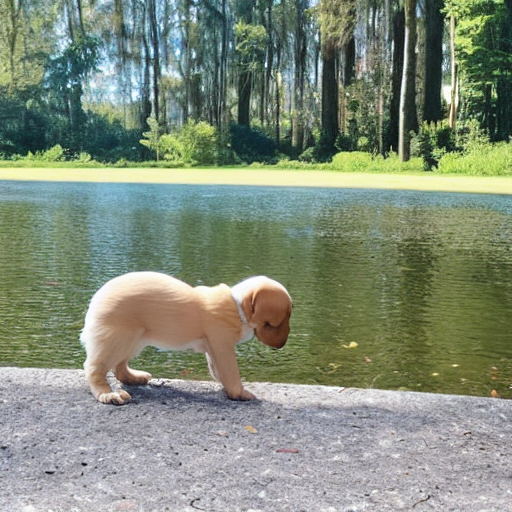

In [ ]:
# Translate Chinese text to English
text = '一隻小狗在大安森林公園湖邊戲水' # @param {type:"string"}
chinese_text = f'{text}'  # Replace with your input in Chinese
english_text = translate_chinese_to_english(chinese_text)
print(f"Translated Text: {english_text}")

# Generate an image from English text prompt
print("Generating image from prompt...")
image_path = generate_image(english_text)
print(f"Image saved at: {image_path}")

# Display the image
img = Image.open(image_path)
img